# Machine Learning Lab

### Student id: \<02404395>
### Name: \<Stefanos Lucena>

## Outline and instructions

Complete the coding assignments below and answer all multiple choice questions in the notebook. Start writing your own code below the "**# YOUR CODE HERE**" comments for each assignment and **remove the "raise NotImplementedError()"**. Don't forget to reply to **the multiple choice questions in sections 3-5** and the **open-ended questions at the bottom**. 

Please do not use tools like Google colab, Visual studio code, Spyder, etc. Sometimes these tools will corrupt the notebook leading to a failure in the automatic grading system (and a 0 grade). You are free to use these tools while solving the assignment, but copy the answers to a fresh assignment notebook using jupyter notebook for submission to Ufora. 

The recommended Python version is **>= 3.9**. The recommended package versions are listed below:

- sklearn >= 1.0.0
- numpy >= 1.21.0
- pandas >= 1.4.0
- matplotlib >= 3.5.0


## Submission instructions:

1. Do not change function definitions or other code that is provided to you. Some cells of the notebook cannot be modified and will be clearly marked as such. Do not forget to execute these cells when scrolling past them.
2. Do not submit .zip files or other archives. Only submit the notebook, do not submit additional files such as data files which were provided to you.
3. Fill in your name and student id in the notebook in the top cell.

## Tips

- Provide enough comments in your code to describe your approach
- Restart the kernel and do a complete run before turning in (Kernel -> Restart & Run all).  The notebook should be able to run all cells top to bottom without showing any errors.
- **Make sure all cells were evaluated successfully!**

In [1]:
import sklearn; print(f"sklearn version is {sklearn.__version__} which should be >= 1.0.0")
import numpy as np; print(f"numpy version is {np.__version__} which should be >= 1.21.0")
import pandas as pd; print(f"pandas version is {pd.__version__} which should be >= 1.4.0")
import matplotlib; print(f"matplotlib version is {matplotlib.__version__} which should be >= 3.5.0")

sklearn version is 1.5.2 which should be >= 1.0.0
numpy version is 1.26.4 which should be >= 1.21.0
pandas version is 2.2.2 which should be >= 1.4.0
matplotlib version is 3.8.2 which should be >= 3.5.0


## Lab session on ensemble methods

#### Recap of the theory

> Combining multiple classifiers or regression models into an '*ensemble model*' can help to achieve a higher accuracy as opposed to training a single prediction model. Critical in the success of combining models is to have **base learners** that are **diverse**, as there is no point in combining learners that make similar decisions.

In this lab session we will explore two of many possible approaches to create **diverse base models** and **combine** them into an **ensemble model**.

In the first part, we will explore **boosting**, an approach in which base learners are constructed in such way that the next learner will focus on the mistakes of the previous learner(s), thus creating diversity. More specifically, we will implement a variant of the AdaBoost algorithm.

In the second part, we will explore **bagging**. In bagging, diversity is created among the base learners by training them on (slightly) different training sets. These different training sets are generated by bootstrapping, simply sampling with replacement from the original training set. Often, the sample size is chosen to be the same as the size of the original training set, but it can be chosen to be less to create extra diversity.

## Context

In this lab session we will build a binary classifier to predict the dropout of a student from a higher education istitution. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success. We formulate this problem as a binary classification task, meaning we have two output labels: students that dropped out and students that did not.

Dataset source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success 


The input variables are the following:

- Marital status
- Application mode
- Application order
- Course
- Daytime/evening attendance	
- Previous qualification
- Previous qualification (grade)
- Nationality
- Mother's qualification
- Father's qualification
- Mother's occupation
- Father's occupation
- Admission grade
- Displaced
- Educational special needs
- Debtor
- Tuition fees up to date
- Gender
- Scholarship holder    
- Age at enrollment
- International
- Curricular units 1st sem (credited)
- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (evaluations)
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Curricular units 1st sem (without evaluations)
- Curricular units 2nd sem (credited)
- Curricular units 2nd sem (enrolled)
- Curricular units 2nd sem (evaluations)
- Curricular units 2nd sem (approved)
- Curricular units 2nd sem (grade)
- Curricular units 2nd sem (without evaluations)
- Unemployment rate
- Inflation rate
- GDP



The output is the student's current status at the registration time:
- Enrolled  (794 instances, non-dropout class)
- Graduate  (2209 instances, non-dropout class)
- Dropout   (1421 instances)


### Outcome
The goal of the binary classifier is to detect whether the student class is 'dropout' or not. 

### Disclaimer:
The presented dataset and the predictions obtained using the following code are only intended for educational purposes and they are not suitable to gain any insight or to draw any conclusion on the underlying truth.

### References
<a id="1">[1]</a> 
M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

# Part 1. AdaBoost

AdaBoost (adaptive boosting) trains a sequence of classifiers in such a way that each classifier specializes in correcting the mistakes of the previous classifiers.

As for all ensemble methods, boosting does not focus on the individual models it uses but rather on creating an ensemble of models that work well when combined. For this reason, AdaBoost implementations often uses weak learners as individual models for boosting. These weak learners may only be slightly better then random but combined they form a very strong model. 

The reasoning of using such weak models as individual models compared to strong models is as follows:

- Weak models are easier and faster to train, and since we most likely want to create many models, fitting many strong learners is likely not feasible given computational limitations.
- If we already have a strong individual model, the improvements made by using the boosting technique will be minimal.
- If we use strong models, the error made is small and as such the error improvement problem will focus on a small subset of data to which the complex model will easily overfit, causing a poorer generalisation.

**Main advantages:** 

- Easy to implement.
- It doesn't have parameters that need to be tuned.
- It doesn't require prior knowledge.
- It has a good mathematical foundation that assures good predictions if we have enough training data and a weak classifier that performs at least slightly better than random.
- It can be less prone to overfitting than traditional models

**Main disadvantages** 

- The performance depends on the data and the type of weak classifier.
- It is susceptible to noise.



### 1.1 Introduction and notation

Consider a $\textbf{binary classification problem}$ and a training
set of the form $(x_1,y_1), ..., (x_N,y_N)$ where $N$ is the number of training samples and each $x_n$ belongs to a domain $X$ and each label $y_n$ belongs to the label set $Y=\{-1,1\}$. In practice, $X$ often contains many distinct features and as such $x_n$ consists of various variables. The label set Y is also free of choice and the main importance here is that it is binary (either $-1$ or $1$). You will see in the below codeblocks that we manually assign these binary labels, where -1 means the student did not drop out (Graduate or Enrolled student) and 1 means the student did drop out (Dropout student).
Additionally, we define a set $M$ as the number of **weak classifiers** $C_1(\cdot),\dots,C_M(\cdot)$
that take a value $x_n$ and try to predict the correct label. Let
$w_{n}^{m}$ be a weight that indicates how important it is for classifier
$C_m(\cdot)$, to make a correct prediction about the label that corresponds to
$x_n$.

AdaBoost iteratively adjusts the weights over the data points such that the weights of the incorrectly classified examples increase, causing the weak classifiers to focus on the harder training examples. 

> Simply said, for each data point in the AdaBoost algorithm there is _a weight that determines how important it is that this data point gets classified correctly_. Such weight is modified after each weak classifier is trained such that incorrectly classified data points are given _more importance_ for the next weak classifier that will be trained.

The final strong classifier is based on a weighted sum of the predictions from the weak classifiers.

### 1.2 Pseudo code


**AdaBoost pseudo-code**

Let $(x_1,y_1), ..., (x_N,y_N)$ be the training data, where $x_n \in X, y_n \in Y=\{-1,1\}$ and $I$ is the indicator function

Initialize $w_{n}^{1} = \frac{1}{N}$ for $n=1,...,N$.

For $m=1, ...,M$

1) Train the classifier $C_m(\cdot)$ by minimizing the weighted error function $\epsilon_m$

\begin{equation*}
  \epsilon_m=\sum_{n=1}^{N} w_n^{m}I(C_m(x_n)\neq y_n).
\end{equation*}

 where $I(C_m(x_n) \neq y_n)$ equals 1 when $C_m(x_n) \neq y_n$ and 0 otherwise.

2) Compute $\epsilon_m$ of the trained individual weak learner.

3) Compute the trained classifier weight $\alpha$:
\begin{equation}
    \alpha_m = \frac{1}{2}\ln\left(\frac{1-\epsilon_m}{\epsilon_m}\right).
\end{equation}

4) Update the datapoints weights so the next weak learner focuses on the error of this weak learner:
\begin{equation}
    w_{n}^{m+1}=\frac{w_{n}^{m}\exp(\alpha_mI(C_m(x_n) \neq y_n))}{\sum_{k=1}^{N}w_{k}^{m}\exp(\alpha_mI(C_m(x_k) \neq y_k))}.
\end{equation}

After finishing the loop, make the final prediction:
\begin{equation}
    Y_M(\cdot)=sign\left(\sum_{m=1}^M\alpha_m C_m(\cdot)\right).
\end{equation}



### 1.3 Implementing AdaBoost

#### Using a very simple base learner: decision stumps

As a first step we will use a very simple base learner called a _decision stump_, which is a a 'weak learner'. Weak learners are defined as learners who perform only slightly better than random guessing and are computionally efficient. 

You will see that this classifier is not complex. It can only use 1 feature and it only creates a very simple decision boundary. Because of the (many) mistakes that are made by an individual weak learner, we will later create an ensemble model of decision stumps.

A decision stump will classify a certain sample as either -1 or 1 depending whether the value of a certain dimension is either larger or smaller than a threshold $\theta$. The dimension is an input parameter of the decision stump.

$f(x) = \left\{ 
\begin{array}{l l}
  1 & \quad {if \, x>\theta}\\
  -1 & \quad {otherwise}\\ \end{array} \right.$
  
  
To use decision stumps we need to implement two operations:
- Applying a decision stump (= make predictions).
- Training a decision stump (= learn optimal threshold $\theta$ for a certain dimension).
 
These functions are already implemented and it is not important to know how they work, only which input parameters they need. To understand how a decision stump operates, have a look at how a decision stump makes prediction based on the plot below. In this plot the red line denotes the learned threshold $\theta$ which perfectly seperates the two classes. In practice it is often impossible to find such a perfect threshold.

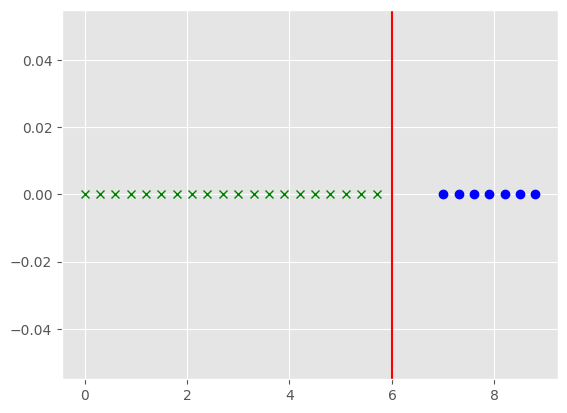

In [2]:
# The following figure illustrates how a decision stump with parameter 'theta' does predictions. 
# The red line represents the decision boundary/threshold theta
# In the plot, everything below theta is classified as 'x' , everything above theta is classified as 'o'

# some imports

import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
np.random.seed(1)

# Select a random theta for illustrative purposes
theta= 6.0

# Define two example arrays on each side of the decision boundary
ar = np.arange(0.0,theta,0.3) 
arr = np.arange(theta+1,9.0,0.3)

# Plot the decision stump boundary 
plt.axvline(theta, c='r')

# Plot how data points on each side of the decision boundary value theta are classified differently
plt.plot(ar, np.zeros_like(ar) , 'x', c='g')
plt.plot(arr, np.zeros_like(arr) , 'o', c='b')
plt.show()

$\textbf{Applying a decision stump}$

In [3]:
def apply_stump(x,theta):
    """
    Function which applies a decision stump on vector x using a threshold theta
    When using this method, each item in the vector x should correspond to a single feature value of the datapoints

    :param x: a vector containing a single feature value for each datapoint (length x == number of datapoints)
    :param theta: decision boundary value
    :return: this function returns the labels of the datapoints based on the prediction of the stump
    """
    # Create vector of ones with the same length as vector x
    output = np.ones(np.shape(x))
    # Set everything below theta to -1
    output[x <= theta] = -1
    # return the predictions
    return output

def calculate_accuracy(y, y_hat):
    """
    Calculates the accuracy using the predicted and real labels.
    
    :param y: real labels (shape N x 1)
    :param y_hat: predicted labels (shape N)
    :return: accuracy
    """
    return np.sum(y[:,0]==y_hat)/len(y)

$\textbf{Training a decision stump}$

In [4]:
def train_stump (x,y,w):
    """
    This function 'trains' a decision stump on a column vector x with corresponding labels y, with weights w

    :param x: a n x 1 vector containing the a single feature value for each datapoint (length x == number of datapoints)
    :param y: a n x 1 vector containing the labels corresponding with each datapoint
    :param w: a n x 1 vector containing the weights currently paired with the datapoint indicating
      how important it is in the error function
    :return: the optimal value theta to minimize the weighted error
    """

    # The number of data points
    number_of_data_points = np.shape(x)[0]
    
    # Init empty array with the same length as x
    sums = np.zeros(number_of_data_points)
    
    # Return the indices for an ascending sorted x
    ind = np.argsort(x)
    x_sorted = x[ind]
    
    # Calculate the cumulative weighted sum along x
    sums = np.cumsum(w[ind]*y[ind][:, 0])

    # Determine the extremum
    extremum_index = np.argmax(abs(sums))
    
    # If it's not the last element, split on the value between the two extrema, else just pick the extremum value
    if ((extremum_index+1) < number_of_data_points):
        theta = (x_sorted[extremum_index] + x_sorted[extremum_index+1])  / 2
    else:
        theta = x_sorted[extremum_index]

    # Swap the sign if we found a minimum
    if (sums[extremum_index] == max(sums)):
        theta = -theta  

    # return the optimal decision boundary value
    return theta
        

#### 1.3.2 Imports, getting the data and setting some variables

The code to load the dataset is provided below.

In [5]:
# Imports
import numpy as np
import pandas as pd
import scipy.io as sio

# Load the data, make sure there is a 'Data' folder containing the dataset in the same folder as this notebook

data = pd.read_csv('Data/student_dropout.csv', sep=r';')
# data = data.drop(labels='name', axis=1) # name feature is removed as non informative

print(data['Target'].value_counts())

def class_label_fun(x):  # function to apply label 1 to the 'dropout' class, label 0 to the others
    if x=='Dropout':
        return 1
    else:
        return -1
data['Target']= data['Target'].apply(class_label_fun)
data = data.sample(frac=1, random_state=0).reset_index(drop=True) # Shuffling rows  (tried 0, 1, 2, 10)
train_perc = 0.70
train_idx = np.arange(0, np.floor(train_perc*len(data)), dtype=np.int64)
test_idx = np.arange(np.floor(train_perc*len(data)), len(data), dtype=np.int64)

train_labels = data.values[train_idx,[-1]].reshape(-1,1)
test_labels = data.values[test_idx,[-1]].reshape(-1,1)
train_data = data.values[train_idx,:-1]
test_data = data.values[test_idx,:-1]

names = list(data.columns)

# Define some variables for later use
number_of_training_samples, number_of_dimensions = np.shape(train_data)
number_of_test_samples = np.shape(test_data)[0]

# Hyperparameters of the algorithm
# The number of iterations to boosting rounds of AdaBoost == the number of weak learners trained
number_of_classifiers = 100

print(f'Training set size: {train_data.shape}')
print(f'Test set size:     {test_data.shape}')
print(f'Features:          {names}')



Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Training set size: (3096, 36)
Test set size:     (1328, 36)
Features:          ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nationality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (ap


### Assignment 1: Training a single weak learner

A decision stump makes predictions using a single feature (1D), therefore to train a decision stump on our dataset, we need to determine the optimal  $\theta$ as well as the optimal dimension/feature that the decision stump will use at each iteration given the current weights.

> Complete the functions `uniform_weights` and `train_and_apply_stump` below such that a decision stump is trained for each dimension. The weights are set such that each datapoint is of equal importance for this assignment (=uniform). The sum of the weights should be 1. Apply your trained stumps to the training set again. Interpret the accuracies you obtain.

In [6]:
################# Initialize some variables #############
# A vector containing the errors of the decision stumps
errors = np.zeros(number_of_dimensions)
################# END Initialize some variables #############

# TASK 1: Set the weights (uniform)
def uniform_weights(number_of_samples):
    """
    This function returns uniform weights, one for each sample.
    All weights are equal and sum to 1.
    
    :param number_of_samples: number of samples
    :return: Numpy array of one weight per sample
    """
    # YOUR CODE HERE
    
    # To obtain the same weight for each sample and ensure the sum is 1
    weight = 1 / number_of_samples 

    # Initialize a list and fill it with the same weight for each sample
    w = []

    for i in range(number_of_samples):
        w.append(weight)
    
    # Convert the list to a numpy array
    w = np.array(w)
    
    return w

# TASK 2: Train and apply a stump
def train_and_apply_stump(train_data, train_labels, w, dimension):
    """
    This function trains a decision stump on one single feature for the dataset.
    
    :param train_data: training data inputs (shape N x D)
    :param train_labels: training data labels, which are -1 or 1 (shape N x 1)
    :param w: weights (shape N)
    :param dimension: integer indicating the input feature to be trained on
    :return: the optimal theta and output of the stump
    """
    
    # YOUR CODE HERE

    #To obtain theta
    theta = train_stump(train_data[:,dimension],train_labels,w)

    #Applying Decision Stump
    out = apply_stump(train_data[:,dimension],theta)
    
    return theta, out

w = uniform_weights(number_of_training_samples)

# Train the models for each feature
theta_and_output = [train_and_apply_stump(train_data, train_labels, w, i) for i in range(number_of_dimensions)]

accuracy = [calculate_accuracy(train_labels, x[1]) for x in theta_and_output]

# Print the maximum and minimum of the accuracy
print(f'Maximum train accuracy (best weak learner performance):    {np.round(max(accuracy)*100,2)} %')
print(f'Minimum train accuracy (worst weak learner performance):   {np.round(min(accuracy)*100,2)} %')


Maximum train accuracy (best weak learner performance):    70.61 %
Minimum train accuracy (worst weak learner performance):   67.6 %


In [7]:
############################# READ ONLY #############################

### Assignment 2: Training the ensemble

You will now implement the training phase of AdaBoost. For this, you will need to train decision stumps for every
dimension in the dataset in every iteration. Next, you will need to select the decision stump that gives the lowest weighted error and update the weights based on the mistakes of this model before moving on to the next generation.

The comments in the code will give you additional directions. Assignment 1 and the pseudo code can guide you further in the right direction. The picture below illustrates the training phase in rounds. Make sure that the picture loads by running this cell.

![Boosting Ensemble](boosting.png)

In [8]:
##### We need to determine the best dimension to train a weak learner on, given the current weights.
# We will keep track of the optimal dimension and the optimal theta for the decision stump in each iteration
# Afterwards, we need to update the weights and compute alpha before going to the next iteration

################# Initialize some variables #############

###### Variables in the global ensemble ######
# A matrix of M (number_of_classifiers) rows, in which a row m, will contain
# the optimal theta in the first column and the best dimension in the second column for best performing
# weak classifier m. 
classifiers = np.zeros((number_of_classifiers,2))

# A vector containing the alpha values for each weak learner which determine how the final combined strong classifier
# is built.
alphas  = np.zeros(number_of_classifiers)
###### END Variables in the global ensemble ######

###### Variables within one round ######
# A vector containing the error on each feature for a single iteration
errors = np.zeros(number_of_dimensions)

# A vector which contains the optimal theta for each dimension determined by a weak learner in a single iteration
thetas = np.zeros(number_of_dimensions)
###### END Variables within one round ######

w = uniform_weights(number_of_training_samples)

################# END Initialize some variables #############

# TASK 1: Calculate the weighted error
def calculate_weighted_error(labels, prediction, w):
    """
    Calculate the weighted error using weights w
    
    :param labels: real data labels, which are -1 or 1 (shape N x 1)
    :param predictions: predicted data labels, which are -1 or 1 (shape N)
    :param w: weights (shape N)
    :return: the weighted error
    """
    # YOUR CODE HERE
    
    error = 0
    
    #Error calculation for incorrect predictions
    for i in range(len(labels)):
        if labels[i] != prediction[i]:
            error += w[i]
            
    return error
    
# TASK 2: Compute statistics on the best model at one iteration
def best_dimension(errors, theta):
    """
    Determine the dimension with the lowest error and its corresponding theta and error values
    
    :param errors: vector of length D containing the error of corresponding models on the different
    :param theta: vector of length D containing theta of corresponding models on the different 
    :return: the index of the best model, its theta and its error
    """
    # YOUR CODE HERE
    
    #Initialize idx_best, theta_best, and error_best by the first value in the errors array
    idx_best = 0
    theta_best = theta[0]
    error_best = errors[0]

    #Loop through all errors to find the best (lowest) error and its corresponding index and theta
    for i in range(1,len(errors)):
        
        if errors[i] < error_best:
            idx_best = i
            theta_best = theta[i]
            error_best = errors[i]
    
    return idx_best, theta_best, error_best

# TASK 3: Compute alpha for the current iteration using the error of the best model
def get_alpha(error_best_dimension):
    """
    Computes alpha for the current iteration using the error of the best model
    
    :param error_best_dimension: scalar representing the error of the best model
    :return: the value of alpha
    """
    # YOUR CODE HERE

    alpha = 0
   
    #Previous check, verify if the error_best_dimension value is valid, and then go to the alpha calculus
    if (error_best_dimension > 0) and (error_best_dimension < 1):
        alpha = 0.5 * np.log((1 - error_best_dimension) / error_best_dimension)
    else:
        print("Error, error_best_dimension value is not valid")
    
    return alpha


# TASK 4: Update weights for next round using alpha (see pseudocode)
def update_weights(w, alpha, out_best_dimension_stump, train_labels):
    """
    Updates the weights w for the current iteration
    
    :param w: vector containing the current weights
    :param alpha: current value of alpha
    :param out_best_dimension_stump: prediction of the best model at the current iteration
    :param train_labels: training labels
    :return: the updated weights
    """
    # YOUR CODE HERE

    #Comparing out_best_dimension_stump with train_labels and updating the weights
    for i in range(len(out_best_dimension_stump)):

        if out_best_dimension_stump[i]==train_labels[i]:
            w[i] = w[i] * np.exp(-alpha)

        else:
            w[i] = w[i] * np.exp(-alpha * (-1))
    
    return w

# Train this many classifiers, amount of rounds == number of classifiers trained, 1 classifier per round
for training_iteration in range(0,number_of_classifiers):
    # Some progress output
    if training_iteration % 50 == 0:
        print('Training, round {}..'.format(training_iteration))
    # Check all the dimensions to determine the optimal one
    
    theta_and_output = [train_and_apply_stump(train_data, train_labels, w, i) for i in range(number_of_dimensions)]
    errors = [calculate_weighted_error(train_labels, x[1], w) for x in theta_and_output]

    # Determine the best decision stump and store the optimal theta + optimal dimension        
    idx_best, theta_best, error_best_dimension = best_dimension(errors, [x[0] for x in theta_and_output])
    classifiers[training_iteration, 0] = theta_best
    classifiers[training_iteration, 1] = idx_best
    
    # Just recompute the output of the best classifier or instead you can also store it while looping (you can choose)
    out_best_dimension_stump = theta_and_output[idx_best][1]
    
    # Compute alpha for the current iteration
    alpha = get_alpha(error_best_dimension)
    alphas[training_iteration] = alpha

    
    # Update weights for next round using alpha
    w = update_weights(w, alpha, out_best_dimension_stump, train_labels)

print('Training done')

Training, round 0..
Training, round 50..
Training done


In [9]:
############################# READ ONLY #############################

## Assignment 3: Making predictions on the train and test set.

We will now determine how the training and test error evolve _with regard to the amount of weak learners in the ensemble_.

For this, we will run the algorithm for a maximum of 200 iterations and store the error scores on both the train and test sets.

This means you have to store error values for a model that uses just a single
weak classifier, a model that uses two weak classifiers,.....  
> **Think about the accuracies that you obtain**

In [10]:
# Initialize the error vectors to 100% error
train_accuracy = np.zeros(number_of_classifiers)
test_accuracy = np.zeros(number_of_classifiers)

# For each number of classifiers == number of rounds
for num_round in range(number_of_classifiers):
    sum_train = np.zeros(number_of_training_samples)
    sum_test = np.zeros(number_of_test_samples)
    # for each classifier up to round num_round (inclusive)
    for n in range(num_round+1):
        weak_classifier = classifiers[n]
        alpha = alphas[n]
        
        out_train = apply_stump(theta=weak_classifier[0], x=train_data[:,int(weak_classifier[1])])
        out_test = apply_stump(theta=weak_classifier[0], x=test_data[:,int(weak_classifier[1])])

        sum_train += alphas[n]*out_train
        sum_test += alphas[n]*out_test
    
    # Make the final prediction by taking the sign of the sum for both train and test set
    final_prediction_train = np.sign(sum_train)
    final_prediction_test = np.sign(sum_test)
    
    # Store the errors
    train_accuracy[num_round] = calculate_accuracy(train_labels,final_prediction_train)
    test_accuracy[num_round] = calculate_accuracy(test_labels,final_prediction_test)
    
# Print the maximum train accuracy and test accuracy
print(f'Best number of weak learners (boosting rounds): {np.argmax(test_accuracy)}')
print(f'AdaBoost maximum training accuracy:             {np.round(max(train_accuracy)*100,2)} %')
print(f'AdaBoost maximum testing accuracy:              {np.round(max(test_accuracy)*100,2)} %')

Best number of weak learners (boosting rounds): 6
AdaBoost maximum training accuracy:             71.96 %
AdaBoost maximum testing accuracy:              73.12 %


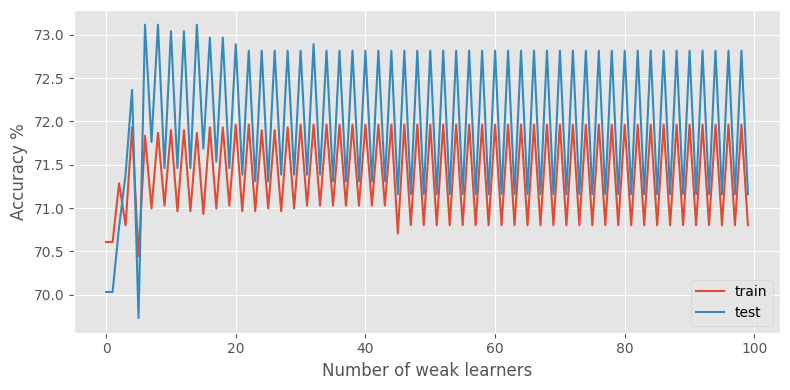

In [11]:
# Plot the train and test error
plt.figure(figsize=(8,4))
axes = plt.gca()
plt.plot(np.array(train_accuracy)*100, label='train')
plt.plot(np.array(test_accuracy)*100, label='test')
plt.xlabel('Number of weak learners')
plt.ylabel('Accuracy %')
plt.tight_layout()
plt.legend()
plt.show()

The above plot shows the training accuracy and testing accuracy as a function of weak learners. Which of the following statements are true?

- A: None of the below.
- B: Since there is a large gap between the training and testing accuracy, the test data clearly does not come from the same data distribution as the train data.
- C: The ensemble underfits as the performance of the individual weak learner (decision stump) is too low.
- D: The ensemble overfits as the complexity is increased by adding more weak learners.


In [12]:
answer_question = 'C'
# e.g. use the following syntax answer_question = 'ac'  answer_question = 'd'  answer_question = 'abc', etc.
# YOUR CODE HERE

In [13]:
############################# READ ONLY #############################

### Assignment 4: Feature importance

A nice additional property of AdaBoost is that it automatically does feature
selection as well. This is very useful when your data is high dimensional
but only a couple of dimensions contain predictive information.

Look at the unique indices (dimensions) you stored in the second column of the variable `classifiers`. Since
you trained more classifiers than there are dimensions, the algorithm obviously
used some dimensions multiple times.
> **How many unique dimensions of the data did the algorithm actually use?**

<font color='red'>_Note: if you receive a warning message `Glyph 9 ( ) missing from current font`, this can safely be ignored._</font>

The amount of unique indices: 13


C:\Users\stefa\AppData\Local\Temp\ipykernel_18876\2491588778.py:32: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\stefa\Desktop\MULT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


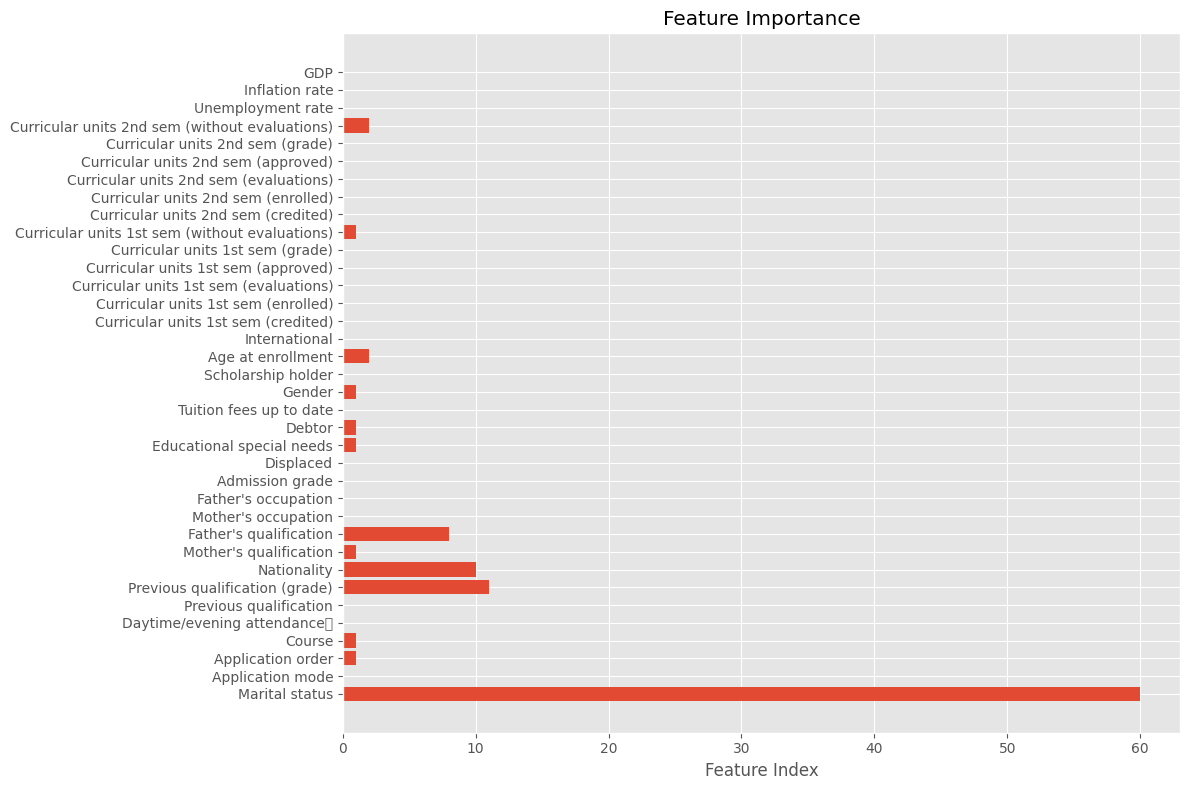

In [14]:
# TASK 1: Calculate the amount of unique dimensions
def get_unique_dimensions(C):
    """
    Returns the amount of unique dimensions
    
    :param classifiers: matrix containing the theta and index of the model at all the iterations (defined above)
    :return: the amount of unique dimensions
    """
    
    # YOUR CODE HERE

    #Extracting the second col from C, to get the all features
    features = C[:,1]

    #Turning it unique
    unique_features = np.unique(features)

    #Counting the amount of unique dimensions
    amount_of_unique_dimensions = len(unique_features)
    
    return amount_of_unique_dimensions


amount_unique_indices = get_unique_dimensions(classifiers[:])

print('The amount of unique indices: {}'.format(amount_unique_indices))

plt.figure(figsize=(12,8))
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.barh(names[:-1],np.bincount(classifiers[:,1].astype(int), minlength=len(names[:-1])))
plt.tight_layout()
plt.show()

In [15]:
############################# READ ONLY #############################

## 2. Bagging

Another method to create diversity is called Bagging or bootstrap
aggregating. To apply Bagging, one uniformly samples $M$ datasets of $\hat{N}$
datapoints from the actual dataset of $N$ points, trains a different classifier on each of
these datasets and finally averages the predictions these classifiers make on
new unseen data.
As base learner we will now use a decision tree.

![Bagging Ensemble](bagging.png)



### Assignment 5: Bagging

> First, complete the `fit_and_evaluate_tree` function below to calculate the train and test error using a single decision tree that has been trained on all the train data. Subsequently, apply bagging for $\hat{N}=200$ and $M=1000$ and write down the result you obtain on the test set as well.
Sample the datasets with replacement to create new bootstrapped datasets of equal size.

In [16]:
# Imports
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree
tree = DecisionTreeClassifier(random_state=1)

# TASK 1: Write a function that fits a tree and returns the predictions of test and train data
def fit_and_evaluate_tree(tree, train_data, train_labels, test_data):
    """
    Fits a tree and returns predictions of train and test data
    
    :param tree: DecisionTreeClassifier object
    :param train_data: training data inputs (shape N x D)
    :param train_labels: training data labels, which are -1 or 1 (shape N x 1)
    :param test_data: testing data inputs (shape N2 x D)
    :return: the predictions of the tree on training and testing data
    """
    
    # YOUR CODE HERE
    
    #Training the decision tree
    tree.fit(train_data, train_labels)

    #Making the predictions
    output_training = tree.predict(train_data)
    output_test = tree.predict(test_data)
    
    return output_training, output_test


output_training, output_test = fit_and_evaluate_tree(tree, train_data, train_labels, test_data)
print('1 Decision Tree, Train Accuracy: {0: .3f} % '.format(calculate_accuracy(train_labels, output_training)*100))
print('1 Decision Tree, Test Accuracy:  {0: .3f} %'.format(calculate_accuracy(test_labels, output_test)*100))

1 Decision Tree, Train Accuracy:  100.000 % 
1 Decision Tree, Test Accuracy:   80.120 %


In [17]:
############################# READ ONLY #############################

In [18]:
# Do bagging
# Set the number of trees
number_of_trees = 1000
size_of_bag = 200
np.random.seed(1)


# TASK 1: Write a method that takes the training data as input and trains a tree on a bootstrapped subset of the training data
def fit_tree_on_bag(train_data, train_labels, size_of_bag):
    """
    Fits a tree and returns predictions of train and test data
    
    :param train_data: training data inputs (shape N x D)
    :param train_labels: training data labels, which are -1 or 1 (shape N x 1)
    :param size_of_bag: size of the bag
    :return: a DecisionTreeClassifier object
    """
    
    # YOUR CODE HERE
    
    #Creating a sample with reposition
    bootstrap_idx = np.random.choice(len(train_data), size=size_of_bag, replace=True)

    #Selecting data and labels by bootstrap_idx
    bootstrap_data = train_data[bootstrap_idx]
    bootstrap_labels = train_labels[bootstrap_idx]

    #Fitting the tree with bootstrapped data
    tree = DecisionTreeClassifier(random_state=1)
    tree.fit(bootstrap_data,bootstrap_labels)
    
    return tree

trees = [fit_tree_on_bag(train_data, train_labels, size_of_bag) for _ in range(number_of_trees)]

# TASK 2: Evaluate an ensemble of trees on data
def evaluate_ensemble(trees, data):
    """
    Obtain predictions for the ensemble (aggregating predictions of individual trees)
    
    :param trees: list of DecisionTreeClassifier objects
    :param data: data inputs (shape N x D)
    :return: ensemble prediction
    """
    # YOUR CODE HERE
    
    #Obtaining the predictions
    predictions = np.array([tree.predict(data) for tree in trees])

    #Convert -1 and 1 to 0 and 1 for bincount
    predictions = ((predictions + 1) // 2).astype(int)

    #Obtaining the output
    output = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

    #Convert back to original class labels -1 and 1
    output = output * 2 - 1
    
    return output

# Make final prediction
output_train = evaluate_ensemble(trees, train_data)
output_test = evaluate_ensemble(trees, test_data)

# Print errors
print('Bagging with {0} trees, Train Accuracy:{1: .3f} %'.format(number_of_trees, calculate_accuracy(train_labels, output_train)*100))
print('Bagging with {0} trees, Test Accuracy: {1: .3f} %'.format(number_of_trees, calculate_accuracy(test_labels, output_test)*100))

Bagging with 1000 trees, Train Accuracy: 88.501 %
Bagging with 1000 trees, Test Accuracy:  87.575 %


In [19]:
############################# READ ONLY #############################

> **The code above trains and evaluates 1000 decision trees. The following code visualizes how the training and test error evolve for the number of trees used.**

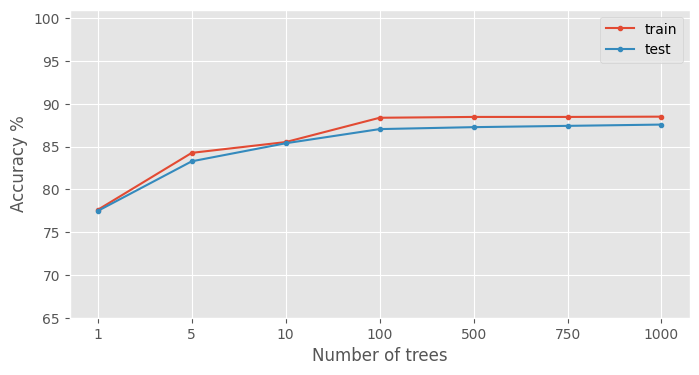

In [20]:
if (len(trees) <1000):
    print('Set trees in code above to 1000 and retrain the ensemble!')
    raise ValueError()
    
number_of_trees = [1,5,10,100,500,750,1000]

train_acc = [calculate_accuracy(train_labels, evaluate_ensemble(trees[:n], train_data)) for n in number_of_trees]
test_acc = [calculate_accuracy(test_labels, evaluate_ensemble(trees[:n], test_data)) for n in number_of_trees]

plt.figure(figsize=(8,4))
plt.plot(np.array(train_acc)*100, label='train', marker='.')
plt.plot(np.array(test_acc)*100, label='test',marker='.')
plt.ylabel('Accuracy %')
plt.xlabel('Number of trees')
plt.xticks(range(len(number_of_trees)), number_of_trees)
plt.ylim(65,101)
plt.legend()
plt.show()


Now a single decision tree without bagging is trained. The train and test accuracy for varying levels of depth of the tree is calculated.

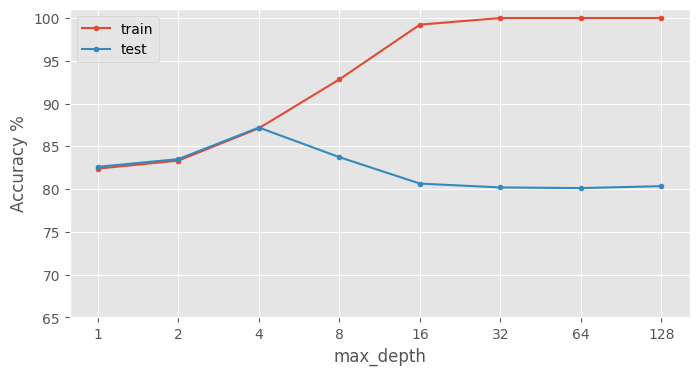

In [21]:
depths = [1,2,4,8,16,32,64,128]
train_error = []
test_error = []

    
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    
    # Fit and evaluate the tree
    output_train, output_test=fit_and_evaluate_tree(tree, train_data, train_labels, test_data)
    
    # Calculate the accuracy
    train_error.append(calculate_accuracy(train_labels, output_train))
    test_error.append(calculate_accuracy(test_labels, output_test))

# Plot
plt.figure(figsize=(8,4))
plt.plot(np.array(train_error)*100, label='train', marker='.')
plt.plot(np.array(test_error)*100, label='test',marker='.')
plt.xticks(range(len(depths)), depths)
plt.ylabel('Accuracy %')
plt.xlabel('max_depth')
plt.ylim(65,101)

plt.legend()
plt.show()

Compare the results of the results with and without bagging. You can play around with the different parameters. Which of the following statements are true?

- A: Bagging reduces overfitting.
- B: Bagging prevents underfitting.
- C: Increasing the tree depth increases the risk to make a single tree overfit.
- D: None of the above.


In [22]:
answer_question = 'A,C'
# YOUR CODE HERE

In [23]:
############################# READ ONLY #############################

# 3. Open questions

#### Question 1
Given a training data set of M samples:
1. Describe the k-fold cross-validation algorithm.
2. Given the current dataset, what variable(s) would you stratify on? Why?
3. What is the size of the test set and the size of the training set in each step of the k-fold cross-validation algorithm? 

(max. 10 lines)

YOUR ANSWER HERE
1. The k-fold cross-validation algorithm is a technique that helps to make a more reliable evaluation of an ML model's performance. The steps to follow this approach are: first, make a random division of the data into k "folds." Then, run k iterations of training and validation. In each iteration, the performance is calculated, for example, by computing the accuracy. Finally, the model's performance is calculated as the average of the k validation results.
2. The stratification should be done on the target variable, which in our current dataset is the student status, because we are interested in evaluating how the model classifies students into the different statuses: withdrawn, enrolled, and graduated.
3. The size of the test set in each step is M/k. Besides that, the size of the training set in each step is (M*(k-1))/k

#### Question 2
In Bagging, the model prediction is obtained by averaging the single predictions of several classifiers (see Part 2). If the errors of single classifiers are highly correlated with respect to the data, how does the final error change? Is bagging less or more effective in this case?  (max. 10 lines)

YOUR ANSWER HERE

The final error increases if the errors of the single classifiers are highly correlated because bagging relies on reducing variance by averaging the predictions of diverse classifiers. If the individual models make similar errors, the diversity in their predictions is reduced, and averaging them becomes less effective. Therefore, bagging is less effective when the errors are highly correlated because it doesn't sufficiently reduce the variance of the ensemble.

#### Question 3

Discuss the sensitivity w.r.t. outliers in the data for both the bagging and boosting method. (max. 10 lines)

YOUR ANSWER HERE

The bagging method performs well when outliers are present because it smooths the impact of outliers by averaging the predictions of many classifiers. On the other hand, the boosting method tends to perform worse than bagging in the presence of outliers because it focuses on correcting mistakes, which can cause the model to overfit to the outliers.